In [1]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(linewidth=np.nan)

### **Exercise 1** ###

In [2]:
input = "52 55 61 66 70 61 64 73 \
        63 59 55 90 109 85 69 72 \
        62 59 68 113 144 104 66 73 \
        63 58 71 122 154 106 70 69 \
        67 61 68 104 126 88 68 70 \
        79 65 60 70 77 68 58 75 \
        85 71 64 59 55 61 65 83 \
        87 79 69 68 65 76 78 94"

input = input.split()
input = [int(i) for i in input]

img = np.array(input, dtype=np.uint8)
img = np.reshape(img, (8, 8))
img

array([[ 52,  55,  61,  66,  70,  61,  64,  73],
       [ 63,  59,  55,  90, 109,  85,  69,  72],
       [ 62,  59,  68, 113, 144, 104,  66,  73],
       [ 63,  58,  71, 122, 154, 106,  70,  69],
       [ 67,  61,  68, 104, 126,  88,  68,  70],
       [ 79,  65,  60,  70,  77,  68,  58,  75],
       [ 85,  71,  64,  59,  55,  61,  65,  83],
       [ 87,  79,  69,  68,  65,  76,  78,  94]], dtype=uint8)

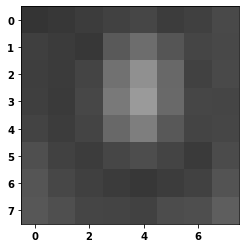

In [3]:
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

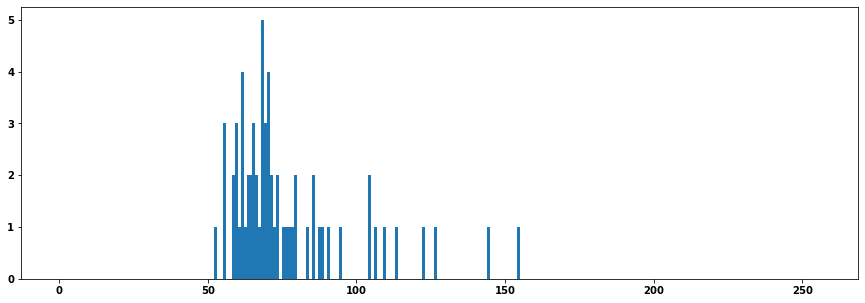

In [5]:
L = 256

#image histogram
plt.figure(figsize=(15, 5))
n, bins, p = plt.hist(img.flatten(),  bins=range(L+1))
plt.show()

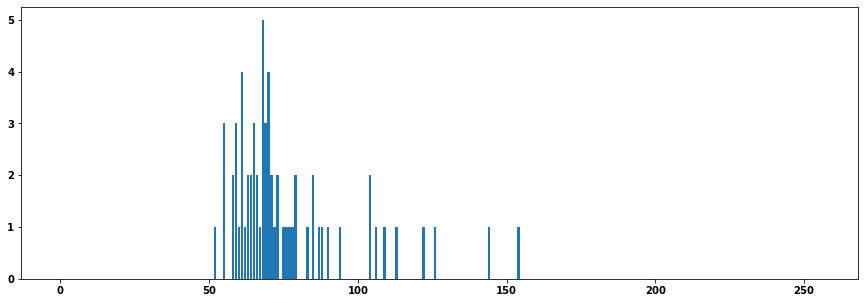

In [6]:
his = [0 for i in range(256)]
for val in img.flatten():
    his[val] += 1

plt.figure(figsize=(15, 5))
plt.bar(np.array(range(L)), np.array(his))
plt.show()

array([[ 5.2,  5.5,  6.1,  6.6,  7. ,  6.1,  6.4,  7.3],
       [ 6.3,  5.9,  5.5,  9. , 10.9,  8.5,  6.9,  7.2],
       [ 6.2,  5.9,  6.8, 11.3, 14.4, 10.4,  6.6,  7.3],
       [ 6.3,  5.8,  7.1, 12.2, 15.4, 10.6,  7. ,  6.9],
       [ 6.7,  6.1,  6.8, 10.4, 12.6,  8.8,  6.8,  7. ],
       [ 7.9,  6.5,  6. ,  7. ,  7.7,  6.8,  5.8,  7.5],
       [ 8.5,  7.1,  6.4,  5.9,  5.5,  6.1,  6.5,  8.3],
       [ 8.7,  7.9,  6.9,  6.8,  6.5,  7.6,  7.8,  9.4]])

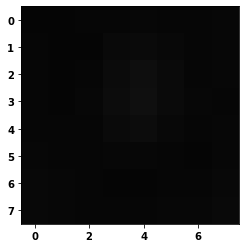

In [7]:
s = 0.1*((img)**1)

plt.imshow(s, cmap='gray', vmin = 0, vmax = 255)
s

#### **Contrast Transform**

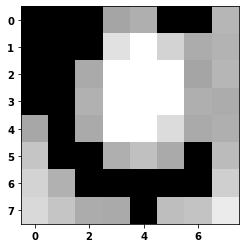

In [9]:
s = np.array(img)
rmin = 65
rmax = 100

for i in range(8):
    for j in range(8):
        if s[i][j] <= rmin:
            s[i][j] = 0
        else:
            s[i][j] = min(s[i][j]*2.5, 255)

plt.imshow(s, cmap='gray', vmin = 0, vmax = 255)

#### **Equal Histogram**

In [ ]:
# Histogram Specification

n_k,_ = np.histogram(img.flatten(), bins=range(L+1))
p_r = n_k/64

S_k = p_r@np.triu(np.full((L,L), 1))
S_k = S_k*255
S_k


array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   0.      ,   3.984375,   3.984375,   3.984375,  15.9375  ,  15.9375  ,  15.9375  ,  23.90625 ,  35.859375,  39.84375 ,  55.78125 ,  59.765625,  67.734375,  75.703125,  87.65625 ,  95.625   ,  99.609375, 119.53125 , 131.484375, 147.421875, 155.390625, 159.375   , 167.34375 , 167.34375 , 171.328125, 175.3125  , 179.296875, 183.28125 , 191.25    , 191.25    , 191.25    , 191.25   

[[  3.984375  15.9375    55.78125   95.625    147.421875  55.78125   75.703125 167.34375 ]
 [ 67.734375  35.859375  15.9375   215.15625  235.078125 203.203125 131.484375 159.375   ]
 [ 59.765625  35.859375 119.53125  239.0625   251.015625 227.109375  95.625    167.34375 ]
 [ 67.734375  23.90625  155.390625 243.046875 255.       231.09375  147.421875 131.484375]
 [ 99.609375  55.78125  119.53125  227.109375 247.03125  211.171875 119.53125  147.421875]
 [191.25      87.65625   39.84375  147.421875 179.296875 119.53125   23.90625  171.328125]
 [203.203125 155.390625  75.703125  35.859375  15.9375    55.78125   87.65625  195.234375]
 [207.1875   191.25     131.484375 119.53125   87.65625  175.3125   183.28125  219.140625]]


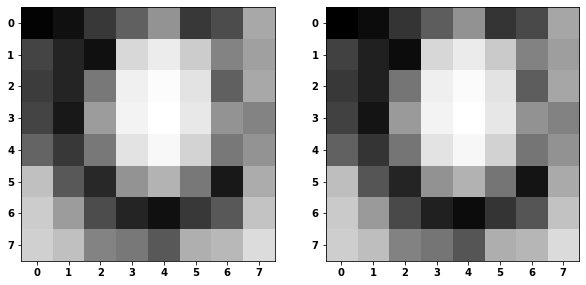

In [ ]:
# Histogram matching

out_img = [S_k[pixel] for pixel in img.flatten()]
out_img = np.reshape(np.array(out_img), (8,8))
print(out_img)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(out_img, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(1,2,2)
plt.imshow(cv2.equalizeHist(img), cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
np.round(out_img)

array([[  4.,  16.,  56.,  96., 147.,  56.,  76., 167.],
       [ 68.,  36.,  16., 215., 235., 203., 131., 159.],
       [ 60.,  36., 120., 239., 251., 227.,  96., 167.],
       [ 68.,  24., 155., 243., 255., 231., 147., 131.],
       [100.,  56., 120., 227., 247., 211., 120., 147.],
       [191.,  88.,  40., 147., 179., 120.,  24., 171.],
       [203., 155.,  76.,  36.,  16.,  56.,  88., 195.],
       [207., 191., 131., 120.,  88., 175., 183., 219.]])

In [ ]:
cv2.equalizeHist(img)

array([[  0,  12,  53,  93, 146,  53,  73, 166],
       [ 65,  32,  12, 215, 235, 202, 130, 158],
       [ 57,  32, 117, 239, 251, 227,  93, 166],
       [ 65,  20, 154, 243, 255, 231, 146, 130],
       [ 97,  53, 117, 227, 247, 210, 117, 146],
       [190,  85,  36, 146, 178, 117,  20, 170],
       [202, 154,  73,  32,  12,  53,  85, 194],
       [206, 190, 130, 117,  85, 174, 182, 219]], dtype=uint8)

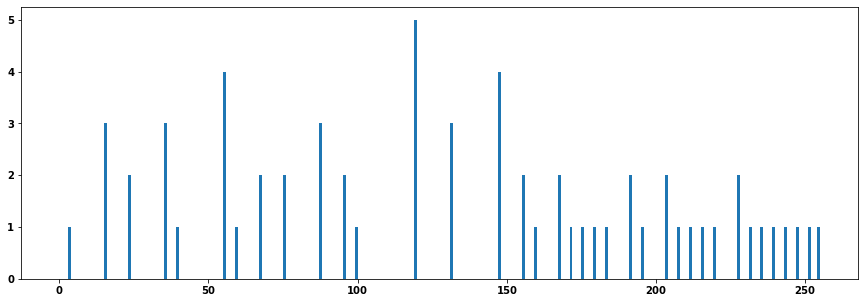

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(out_img.flatten(), range(L))
plt.show()

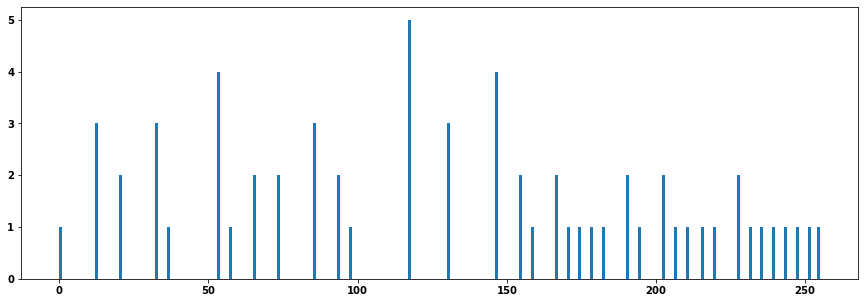

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(cv2.equalizeHist(img).flatten(), range(L))
plt.show()

#### **Filter image**

In [ ]:
def show(in_img):
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
    plt.subplot(1,2,2)
    plt.imshow(in_img, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

[[ 55  57  63  72  75  72  69  70]
 [ 58  59  69  86  93  85  74  70]
 [ 61  62  77 102 114 100  79  70]
 [ 62  64  80 107 117 102  79  69]
 [ 66  65  75  94 101  90  74  69]
 [ 73  68  69  75  78  74  70  71]
 [ 79  73  67  65  66  67  73  78]
 [ 83  76  69  64  65  68  78  84]]


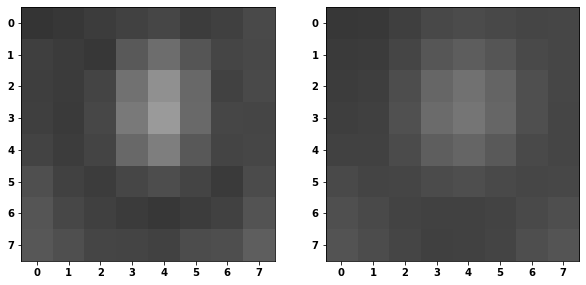

In [ ]:
def mean_filter_3x3(img):
    height, lenght = img.shape
    padding_img = np.full((height+2, lenght+2), 0)
    padding_img[1:1+height, 1:1+lenght] = img

    padding_img[0][0] = padding_img[1][1]
    padding_img[height+1][lenght+1] = padding_img[height][lenght]
    padding_img[0][1+lenght] = padding_img[1][lenght]
    padding_img[height+1][0] = padding_img[height][1]
    for i in range(1, lenght + 1):
        padding_img[0][i] = padding_img[1][i]
        padding_img[height+1][i] = padding_img[height][i]
    for i in range(1, height+1):
        padding_img[i][0] = padding_img[i][1]
        padding_img[i][lenght+1] = padding_img[i][lenght]

    out_img = np.array(img)
    for y in range(1, height+1):
        for x in range(1, lenght+1):
            out_img[y-1][x-1] = np.sum(padding_img[y-1:y+2, x-1:x+2])/9

    return np.around(out_img)

print(mean_filter_3x3(img))
show(mean_filter_3x3(img))   

[[ 55  55  61  66  70  69  69  72]
 [ 59  59  61  70  90  70  72  72]
 [ 62  62  68 109 109 104  72  70]
 [ 62  63  68 113 113 104  70  70]
 [ 65  65  68  77 104  77  70  70]
 [ 71  67  65  68  70  68  68  70]
 [ 79  71  68  65  68  65  75  78]
 [ 85  79  69  65  65  65  78  83]]


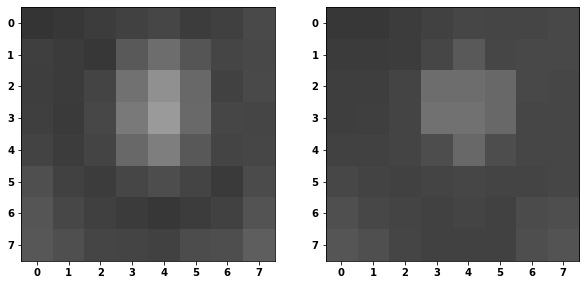

In [ ]:
def median_filter_3x3(img):
    height, lenght = img.shape
    padding_img = np.full((height+2, lenght+2), 0)
    padding_img[1:1+height, 1:1+lenght] = img

    padding_img[0][0] = padding_img[1][1]
    padding_img[height+1][lenght+1] = padding_img[height][lenght]
    padding_img[0][1+lenght] = padding_img[1][lenght]
    padding_img[height+1][0] = padding_img[height][1]
    for i in range(1, lenght + 1):
        padding_img[0][i] = padding_img[1][i]
        padding_img[height+1][i] = padding_img[height][i]
    for i in range(1, height+1):
        padding_img[i][0] = padding_img[i][1]
        padding_img[i][lenght+1] = padding_img[i][lenght]

    out_img = np.array(img)
    for y in range(1, height+1):
        for x in range(1, lenght+1):
            out_img[y-1][x-1] = np.sort(padding_img[y-1:y+2, x-1:x+2], axis=None)[4]

    return np.around(out_img)

print(median_filter_3x3(img))
show(median_filter_3x3(img))   

[[ 63  63  90 109 109 109  85  73]
 [ 63  68 113 144 144 144 104  73]
 [ 63  71 122 154 154 154 106  73]
 [ 67  71 122 154 154 154 106  73]
 [ 79  79 122 154 154 154 106  75]
 [ 85  85 104 126 126 126  88  83]
 [ 87  87  79  77  77  78  94  94]
 [ 87  87  79  69  76  78  94  94]]


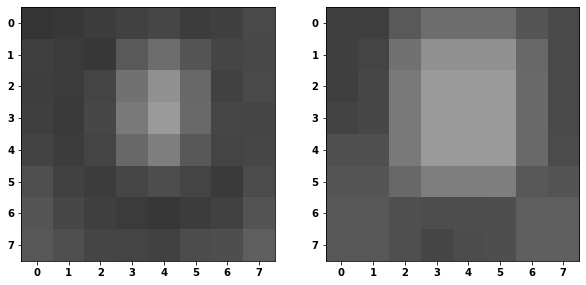

In [ ]:
def max_filter_3x3(img):
    height, lenght = img.shape
    padding_img = np.full((height+2, lenght+2), 0)
    padding_img[1:1+height, 1:1+lenght] = img

    padding_img[0][0] = padding_img[1][1]
    padding_img[height+1][lenght+1] = padding_img[height][lenght]
    padding_img[0][1+lenght] = padding_img[1][lenght]
    padding_img[height+1][0] = padding_img[height][1]
    for i in range(1, lenght + 1):
        padding_img[0][i] = padding_img[1][i]
        padding_img[height+1][i] = padding_img[height][i]
    for i in range(1, height+1):
        padding_img[i][0] = padding_img[i][1]
        padding_img[i][lenght+1] = padding_img[i][lenght]

    out_img = np.array(img)
    for y in range(1, height+1):
        for x in range(1, lenght+1):
            out_img[y-1][x-1] = np.max(padding_img[y-1:y+2, x-1:x+2])

    return np.around(out_img)

print(max_filter_3x3(img))
show(max_filter_3x3(img))   

[[52 52 55 55 61 61 61 64]
 [52 52 55 55 61 61 61 64]
 [58 55 55 55 85 66 66 66]
 [58 58 58 68 88 66 66 66]
 [58 58 58 60 68 58 58 58]
 [61 60 59 55 55 55 58 58]
 [65 60 59 55 55 55 58 58]
 [71 64 59 55 55 55 61 65]]


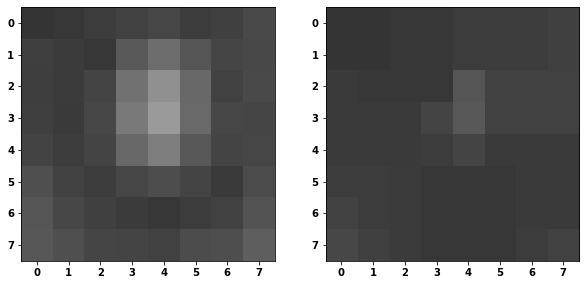

In [ ]:
def min_filter_3x3(img):
    height, lenght = img.shape
    padding_img = np.full((height+2, lenght+2), 0)
    padding_img[1:1+height, 1:1+lenght] = img

    padding_img[0][0] = padding_img[1][1]
    padding_img[height+1][lenght+1] = padding_img[height][lenght]
    padding_img[0][1+lenght] = padding_img[1][lenght]
    padding_img[height+1][0] = padding_img[height][1]
    for i in range(1, lenght + 1):
        padding_img[0][i] = padding_img[1][i]
        padding_img[height+1][i] = padding_img[height][i]
    for i in range(1, height+1):
        padding_img[i][0] = padding_img[i][1]
        padding_img[i][lenght+1] = padding_img[i][lenght]

    out_img = np.array(img)
    for y in range(1, height+1):
        for x in range(1, lenght+1):
            out_img[y-1][x-1] = np.min(padding_img[y-1:y+2, x-1:x+2])

    return np.around(out_img)

print(min_filter_3x3(img))
show(min_filter_3x3(img))   

#### **Binarization Image**

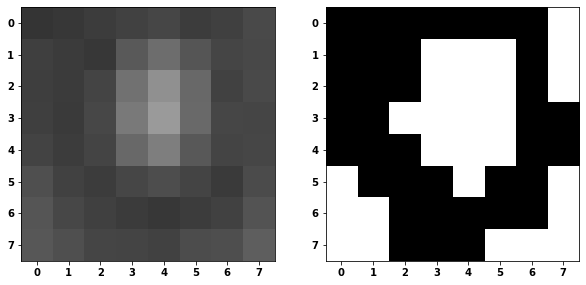

In [ ]:
def Binarization(img, threshold=70):
    out_img = np.array(img)
    out_img[out_img > threshold] = 255
    out_img[out_img <= threshold] = 0

    return out_img

show(Binarization(img))


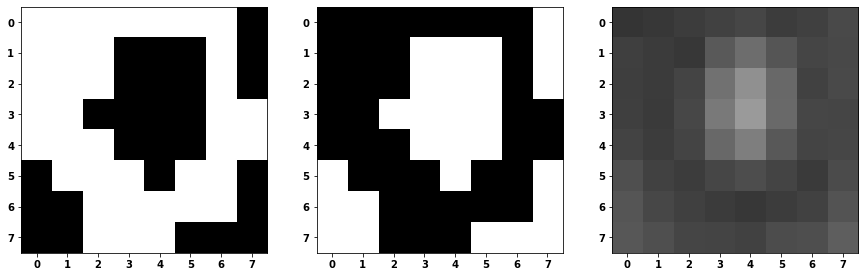

In [ ]:
_, img_1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY_INV)
_, img_2 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)

plt.figure(figsize=(15, 33))

plt.subplot(1, 3, 1)
plt.imshow(img_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.imshow(img_2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.show()

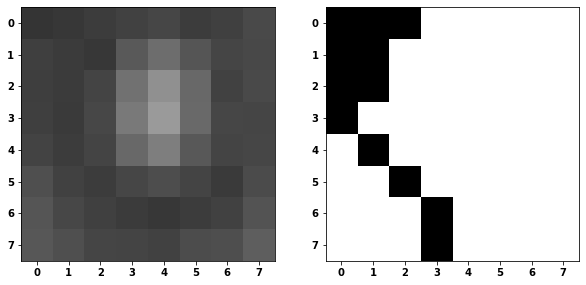

In [ ]:
def Dilation(img):
    out_img = np.array(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y][x] != 0:
                out_img[y][x] = img[y][x]
                continue
            if x-1 > -1 and img[y][x-1] != 0:
                out_img[y][x] = img[y][x-1]
                continue
            if x+1 < img.shape[1] and img[y][x+1] != 0:
                out_img[y][x] = img[y][x+1]
                continue
            if y-1 > -1 and img[y-1][x] != 0:
                out_img[y][x] = img[y-1][x]
                continue
            if y+1 < img.shape[0] and img[y+1][x] != 0:
                out_img[y][x] = img[y+1][x]
                continue

    return out_img

show(Dilation(Binarization(img)))

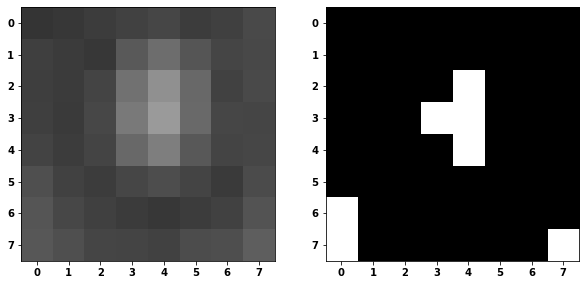

In [ ]:
def Erosion(img):
    out_img = np.array(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y][x] == 0: continue
            if x-1 > -1 and img[y][x-1] == 0:
                out_img[y][x] = 0
                continue
            if x+1 < img.shape[1] and img[y][x+1] == 0:
                out_img[y][x] = 0
                continue
            if y-1 > -1 and img[y-1][x] == 0:
                out_img[y][x] = 0
                continue
            if y+1 < img.shape[0] and img[y+1][x] == 0:
                out_img[y][x] = 0
                continue

    return out_img

show(Erosion(Binarization(img)))